# 201543122 김기범

In [5]:
import pandas as pd
import numpy as np
#pandas 로 파일 불러오기
df = pd.read_csv('c://bd092_data/bd01_exam.csv')
df.head() # 파일 불러온 후 전처리 위해 점검하기 
df.tail()
df.info() # non-null값은 몇 개인지, 총 칼럼 수와 인덱스는 몇 개인지 파악해 보자. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      503 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      500 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      503 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# NOX, DIS, TAX, 에 NULL값 발견
df.describe() # 수치 데이터 값들 각종 평균, 최솟값, 최댓값등에 이상 없는지 확인해보자. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,503.000000,506.000000,506.000000,500.000000,506.000000,503.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.555415,6.284634,68.574901,3.774835,9.549407,408.833002,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115838,0.702617,28.148861,2.106313,8.707259,168.862329,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.087875,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.142300,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.118000,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum() #null값들 칼럼별로 총 몇 개 있는지, 디테일하게 확인해보자. 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        3
RM         0
AGE        0
DIS        6
RAD        0
TAX        3
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
df['NOX'] = df['NOX'].fillna(df['NOX'].mean())
df['DIS'] = df['DIS'].fillna(df['DIS']).mean()
df['TAX'] = df['TAX'].fillna(df['TAX'].mean())
# nan 값 평균값으로 대체함. 

In [11]:
df.isnull().sum() # null값들이 모두 위 코드로 평균값으로 대체되었음을 알 수 있다. 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.info() # 다시 재차 점검해보면, 모든 값들이 공값이 없음을 알 수 있다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [40]:
#상관분석 실행하기 
df.corr()
import seaborn as sns # 히트맵으로 나타내려 했으나 너무 복잡하다.  다른 방식을 찾자. 

cat = df.corr()
cat.index # 인덱싱으로 MEDV 레코드만 쭉 다 가져와서, 다른 변수들과 상관관계 얼마씩 있는지 보자. 
cat.iloc[13].sort_values(ascending=False) # MEDV 레코드는 13번째 인덱스에 있고, 해당 데이터만 시리즈로 불러오자. 
# medv와 상관관계가 가장 높은 변수 세 개는 LSTAT, RM, PTRATIO 이다. 

MEDV       1.000000e+00
RM         6.953599e-01
ZN         3.604453e-01
B          3.334608e-01
CHAS       1.752602e-01
DIS        2.925485e-15
AGE       -3.769546e-01
RAD       -3.816262e-01
CRIM      -3.883046e-01
NOX       -4.291570e-01
TAX       -4.713020e-01
INDUS     -4.837252e-01
PTRATIO   -5.077867e-01
LSTAT     -7.376627e-01
Name: MEDV, dtype: float64

In [35]:
# 위 세 변수를 독립변수로 설정하고, MEDV 를 종속변수 설정해서 다중선형 회귀분석 진행하기 
x = df[['LSTAT', 'RM', 'PTRATIO']] # X값과 Y 값 분리 
y = df['MEDV']
# 상수항 추가하기 
import statsmodels.api as sm # 모델링 및 학습, 상수항 추가를 위해 불러온다. 
x1 = sm.add_constant(x, has_constant='add') # 상수항을 X 쪽에 추가해준다.
x1.head()
multi_model = sm.OLS(y, x1).fit() # 모델링 후 fit() 으로 학습시키기
multi_model.summary() # 학습한 결과를 출력해서 알려달라. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          2.69e-123
Time:                        10:50:24   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.000      10.879      26.255
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
RM             4.5154      0.426     10.603      0.000       3.679       5.352
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 분석결과 해석 : 
# 이 분석은 67.7% 설명력을 갖는다. 
# F분포 p 값이 유의수준 0.05보다 작기 때문에, 이 값은 통계적으로 '타당하다'
# coef값들도 p 값이 유의수준 0.05보다 작기 때문에 이 값들은 통계적으로 '타당하다'
# LSTAT = -0.5718, RM = 4.5154, PTRATIO= -0.9307 만큼 각각 MEDV에 영향 미친다. 
# LSTAT가 1단위 증가할때 MEDV는 -0.5718만큼 감소한다. 
# RM이 1단위 증가할 때, MEDV는 4.5145만큼 증가한다. 
# PTRATIO 1단위 증가할 때 MEDV는 -0.9307만큼 감소한다. 
# 따라서 MEDV, 주택 가격에 가장 큰 영향 미치는 변수는 RM이다. 


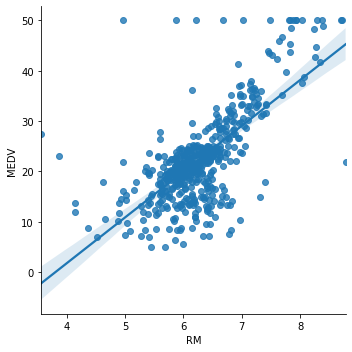

In [36]:
# RM과 MEDV로 회귀선 그래프그리기 
import seaborn as sns
sns.lmplot(y='MEDV', x='RM', data=df)
# 회귀선 그래프 출력 완료 . y = b0 + b1*x1 값을 시각화해서 나타낸 그래프이다. 
# 이 사례에서는 MEDV = 18.5671 + 4.5154*RM 을 그래프로 시각화해서 나타낸 것이다. 